# GA 2.4: Beary Icy

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.4, Time Series Analysis. For: December 6, 2024*

Winter is coming and it is time to start getting our models ready for the ice classic. Our first goal is to improve the temperature model, as that seems to be an important factor in determining breakup day. Temperature is notoriously hard to predict, but we can analyze historical data to get a better understanding of the patterns.

In this assignment we will analyze a time series from a **single year**; in fact, only the **first 152 days of the year**, from January 1 until June 1. This is the period of interest for the ice classic, as the ice forms in this period, reaching its maximum thickness between January-March, and then starts melting, with breakup day typically happening in April or May.

Remember that we have until April 5 to place a bet. Why, then do we want to fit a model several months beyond this point? This gives us confidence in assessing the ability of the model to predict temperature, so that when we use it on April 5 to make **predictions** about the future, we can understand the uncertainty associated with it.

Let's start by loading the data and plotting it, then we will determine which components should be used to detrend it.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import chi2
from scipy.signal import periodogram

### Part 1: Load the data and plot it


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.1:</b>   

Do the following:

- load the data
- create time vector
- plot the data

</p>
</div>

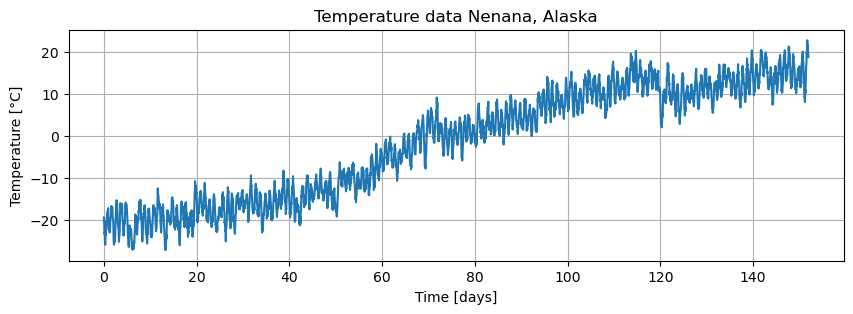

In [8]:
# YOUR_CODE_HERE

# SOLUTION
# Reading the data from the file
data = np.loadtxt('temperature.csv')
time_hours = np.arange(0, len(data))
time_days = time_hours / 24
dt = time_days[1] - time_days[0]
fs = 1 / dt

# Plotting the data
plt.figure(figsize=(10, 3))
plt.plot(time_days, data)
plt.xlabel('Time [days]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature data Nenana, Alaska')
plt.grid(True)
# END SOLUTION BLOCK

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.2:</b>   

Use the Markdown cell below to describe the data (you can use a few bullet points). For example, confirm relevant characteristics like number of points, units, describe the values (qualitatively), etc.

</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

- There are 24*152 points (hourly)
- Looks like there is a bit of variation around a central line, but the general increase in temperature throughout the spring is larger than the variation
- the general trend looks linear in the middle, but flattens out at the ends, which is to be expected with a periodic annual cycle
- looks like there is something "funny" happening around day 70 and 120

</p>
</div>

## Part 2: Extract the Dominant Patterns

We clearly see that the data contains a strong pattern (the general increase in temperature from winter to summer). We will start by fitting a functional model to the data in order to stationarize it. To find the frequency of the seasonal pattern we will use the power spectrum of the data.

We will reuse the function `find_seasonal_pattern` from the workshop.

Remember that for running this function we need to predefine the A-matrix to detrend the data. Since the data only contains the first 5 months of the year, we see that the temperature is increasing over time. What type of model would be most appropriate to remove the seasonal trend? 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.1:</b>   

Define functions to help carry out this analysis, for example, <code>fit_model</code> and <code>find_frequency</code>.

</p>
</div>

In [ ]:
def fit_model(data, time, A, plot=False):
    '''
    Function to find the least squares solution of the data
    data: input data
    time: time vector
    A: A-matrix to fit the data
    plot: boolean to plot the results or not
    '''

    # x_hat = YOUR_CODE_HERE # least squares solution
    # y_hat = YOUR_CODE_HERE # model prediction
    # e_hat = YOUR_CODE_HERE # residuals

    # SOLUTION
    x_hat = np.linalg.solve(A.T @ A, A.T @ data)
    y_hat = A @ x_hat
    e_hat = data - y_hat
    # END SOLUTION BLOCK

    if plot:
        plt.figure(figsize=(10, 5))
        plt.subplot(211)
        plt.plot(time, data, label='Data')
        plt.plot(time, y_hat, label='Estimated data')
        plt.xlabel('Time [days]')
        plt.ylabel('Temperature [°C]')
        plt.title('Data vs Estimated data')
        plt.grid(True)
        plt.legend()
        plt.subplot(212)
        plt.plot(time, e_hat, label='Residuals')
        plt.xlabel('Time [days]')
        plt.ylabel('Temperature [°C]')
        plt.title('Residuals')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()

    return x_hat, y_hat, e_hat

def find_frequency(data, time, A, fs, plot=True):
    '''
    Function to find the dominant frequency of the signal
    data: input data
    time: time vector
    A: A-matrix to detrend the data (prior to spectral analysis)
    fs: sampling frequency
    plot: boolean to plot the psd or not
    '''
    # Detrending the data
    _, _, e_hat= fit_model(data, time, A)

    N = len(data)

    # Finding the dominant frequency in e_hat
    # freqs, pxx = periodogram(YOUR_CODE_HERE, fs=YOUR_CODE_HERE, window='boxcar',
    #                          nfft=N, return_onesided=False,
    #                          scaling='density')
    
    # SOLUTION
    # Finding the dominant frequency in e_hat
    freqs, pxx = periodogram(e_hat, fs=fs, window='boxcar',
                                nfft=N, return_onesided=False,
                                scaling='density')
    # END SOLUTION BLOCK

    # finding the dominant frequency and amplitude
    # Note: there are many ways to do this
    # amplitude = YOUR_CODE_HERE # Amplitude of the dominant frequency
    # dominant_frequency = YOUR_CODE_HERE # Dominant frequency

    # SOLUTION
    # finding the dominant frequency and amplitude
    dominant_frequency, amplitude = freqs[np.argmax(pxx)], np.max(pxx)
    # END SOLUTION BLOCK

    # Plotting the PSD
    if plot:
        plt.figure(figsize=(10, 5))
        plt.subplot(211)
        plt.plot(time, e_hat)
        plt.title('Residuals')
        plt.ylabel('Atmospheric Pressure [hPa]')
        plt.grid(True)
        plt.subplot(212)
        plt.plot(freqs[freqs>0], pxx[freqs>0], label='PSD of residuals')
        plt.xlabel('Frequency')
        plt.ylabel('PSD')
        plt.title('Power Spectral Density')
        plt.grid(True)
        plt.plot(dominant_frequency, amplitude, 'ro', label='Dominant Frequency')
        plt.yscale('log')
        plt.xscale('log')
        plt.legend()
        plt.tight_layout()

    return dominant_frequency


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.2:</b>   

Now provide an A-matrix that removes the trend from the data. There are multiple answers that will work, but some are better than others.

First, use the Markdown cell below to define your A-matrix and include a brief explanation justifying your choice.
</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

- The best model (chosen a priort) would be a periodic signal, as we know the temperature behaves this way.
- A linear model may approximate the increasing temperature well, but it is not going to fit the ends well.
- It turns out a power law model gives the best quantitative fit, but this would also be problematic if we need to extrapolate beyond the data range.

</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.3:</b>   

Now define the A-matrix in code and extract the seasonal pattern. Continue extracting components until the time series is stationary (you will then summarize your findings in the next task).
</p>
</div>

Dominant Frequency: 1.00


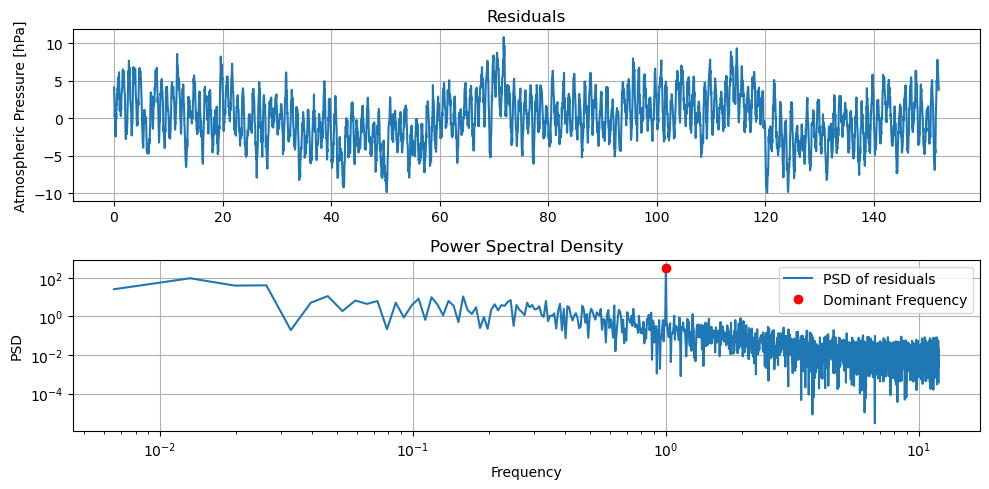

In [10]:
# YOUR_CODE_HERE


# SOLUTION
A = np.column_stack((np.ones(len(data)), np.cos(2*np.pi*time_days/365), np.sin(2*np.pi*time_days/365)))
dom_f = find_frequency(data, time_days, A, fs=fs)
print(f'Dominant Frequency: {dom_f:.2f}')
# END SOLUTION BLOCK

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.4:</b>   

Describe your results for making the time series stationary. Include at least: a) the number and types of components used (and their parameters), b) how you decided to stop extracting components.
</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

- annual signal is obvious, then of course daily (definitley periodic)
- PSD after taking out the daily signal indicates this is enough

</p>
</div>

## Fitting the Functional Model

In the next cell we will fit the model to generate stationary residuals. Above, you may have a periodic signal, where for each dominant frequency $f_i$ ($i=1,2$) the model is:

$$a_i  \cos(2\pi f_i  t) + b_i  \sin(2\pi f_i t)$$ 

However, to report the periodic signals we would like to have the amplitude, phase shift and the frequency of those signals, which can be recovered from:
$$A_i  \cos(2\pi f_i  t + \theta_i)$$
Where the amplitude $A_i = \sqrt{a_i^2 + b_i^2}$ and $\theta_i = \arctan(-b_i/a_i)$

Note: in Section 4.1 book this was shown where the angular frequency $\omega = 2\pi f$ was used.


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.5:</b>   

Complete the code cell below to create the functional model.

</p>
</div>

Estimated Parameters (standard deviation):
x0 = -5.702
x1 = 0.227
x2 = -2.989
x3 = -17.784
x4 = 10.409

The seasonal component is rewritten as:
Ak = 2.998, theta_k = 1.495, f_k = 1.000
Ak = 20.606, theta_k = -2.612, f_k = 0.003


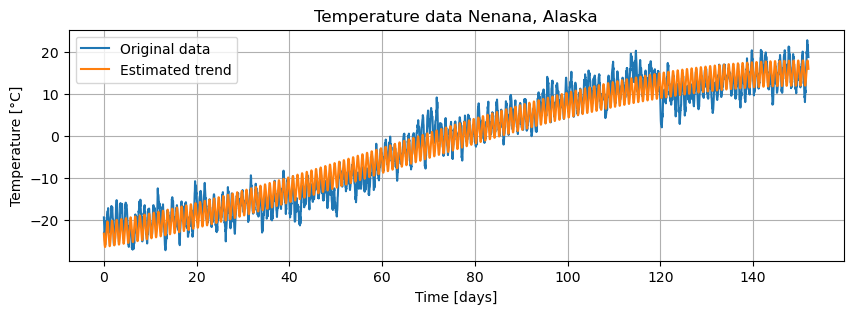

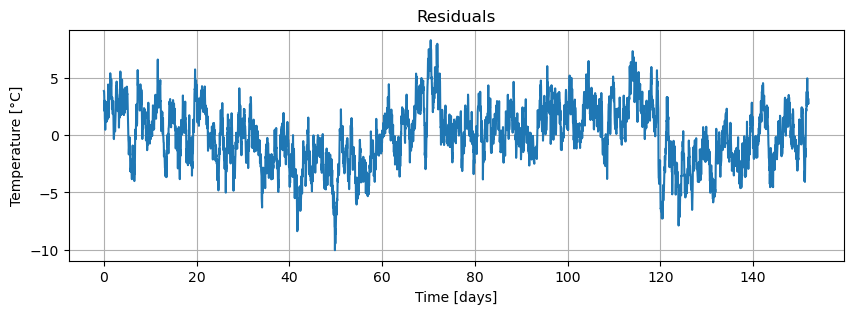

In [ ]:
def rewrite_seasonal_comp(ak, bk):
    '''
    Function to rewrite the seasonal component in terms of sin and cos
    ak: seasonal component coefficient for cos
    bk: seasonal component coefficient for sin
    '''
    # YOUR_CODE_HERE

    # SOLUTION
    Ak = np.sqrt(ak**2 + bk**2)
    theta_k = np.arctan2(-bk, ak)
    return Ak, theta_k
    # END SOLUTION BLOCK

# creating the A matrix of the functional model
# A = YOUR_CODE_HERE
# x_hat, y_hat, e_hat = YOUR_CODE_HERE


# SOLUTION
A = np.column_stack((np.ones(len(data)),
                        np.cos(2*np.pi*1*time_days), np.sin(2*np.pi*1*time_days),
                        np.cos(2*np.pi*time_days/365), np.sin(2*np.pi*time_days/365)))

x_hat, y_hat, e_hat = fit_model(data, time_days, A)
# END SOLUTION BLOCK

# Plotting the data and the estimated trend
plt.figure(figsize=(10, 3))
plt.plot(time_days, data, label='Original data')
plt.plot(time_days, y_hat, label='Estimated trend')
plt.xlabel('Time [days]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature data Nenana, Alaska')
plt.grid(True)
plt.legend()

# Plotting the residuals
plt.figure(figsize=(10, 3))
plt.plot(time_days, e_hat)
plt.xlabel('Time [days]')
plt.ylabel('Temperature [°C]')
plt.title('Residuals')
plt.grid(True)

# Extracting the seasonal component coefficients from the estimated parameters

# SOLUTION
ak = np.array([x_hat[1], x_hat[3]])
bk = np.array([x_hat[2], x_hat[4]])
freqs = np.array([1, 1/365])
# END SOLUTION BLOCK

print(f'Estimated Parameters:')
for i in range(len(x_hat)):
    print(f'x{i} = {x_hat[i]:.3f}')

print('\nThe seasonal component is rewritten as:')
for i, j, k in zip(ak, bk, freqs):
    Ak, theta_k = rewrite_seasonal_comp(i, j)
    print(f'Ak = {Ak:.3f}, theta_k = {theta_k:.3f}, f_k = {k:.3f}')



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.6:</b>   

Are the residuals stationary? State yes or now and describe why in the cell below.

</p>
</div>

# Part 3: Finding the grizzly

When we look at the residuals after removing the periodic pattern(s), we see that there is still a pattern in the data. From researchers in the Nenana area we have heard that there is a grizzly bear that likes to take a nap (hibernate) in the area. We suspect that the grizzly bear has slept too close to the temperature sensor and has influenced the data. 

In the next cell we will write an offset detection algorithm to find the offset in the data. The offset detection algorithm is based on the likelihood ratio test framework. However, due to the presence of autocorrelation in the residuals, the traditional critical values for the likelihood ratio test are not valid. Therefore, we will use a bootstrap approach to estimate the critical values. Luckily, this is not the first time we had to remove a grizzly bear from our data, so we know that the estimated critical values is approximately 100.

## The offset detection algorithm
The offset detection algorithm is based on the likelihood ratio test framework. The likelihood ratio test has a test statistic that is given by:

$$\Lambda = n \log \left( \frac{S_0}{S_1} \right)$$

where $S_0$ is the sum of the squared residuals for the model without an offset, $S_1$ is the sum of the squared residuals for the model with an offset, and $n$ is the number of data points. The likelihood ratio test statistic is compared to a critical value to determine if an offset is present in the data.

To find the jump location we will use the following algorithm:
1. Calculate the sum of the squared residuals for the model without an offset, $S_0$.
2. Calculate the sum of the squared residuals for the model with an offset at each data point, $S_1$.
   1. For each data point we will calculate the sum of the squared residuals for the model with an offset at that data point.
   2. The A-matrix for the model with an offset is the same as the A-matrix for the model without an offset, but with an additional column that is 0 till the data point and 1 after the data point.
3. We will find the offset location that maximizes the likelihood ratio test statistic.
4. We will include the offset in the model and repeat the process until the likelihood ratio test statistic is below the critical value.


Break Point: 2871 with : 1305.83
Break Point: 1410 with : 754.18
Break Point: 1540 with : 77.73


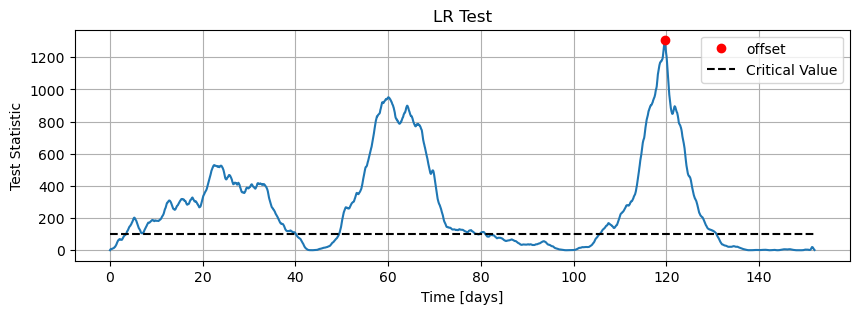

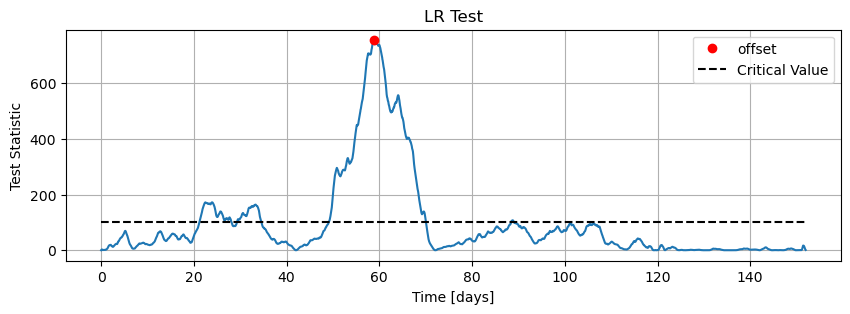

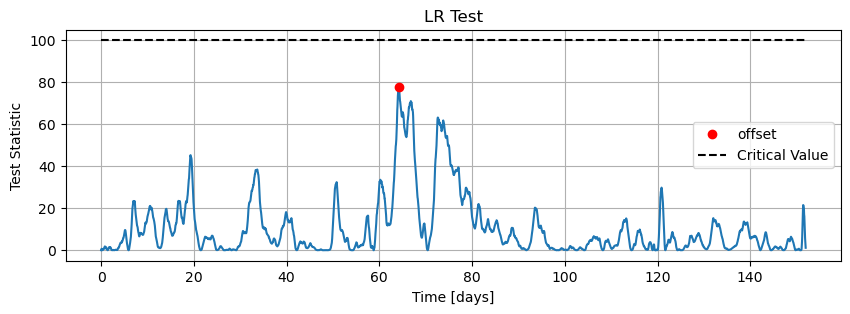

In [ ]:
def A1_matrix(A0, break_point):
    '''
    Function to create the A1 matrix
    A0: A matrix under H0
    break_point: break point location
    '''
    A1 = np.zeros((A0.shape[0], A0.shape[1]+1))
    A1[:, :-1] = A0
    new_col = np.zeros(A0.shape[0])
    new_col[break_point:] = np.ones(A0.shape[0]-break_point)
    A1[:, -1] = new_col
    return A1


def LR(e0, e1, cv=100, verbose=True):
    '''
    Function to perform the LR test
    e0: residuals under H0
    e1: residuals under H1
    cv: critical value
    '''
    n = len(e0)
    SSR0 = e0.T @ e0
    SSR1 = e1.T @ e1
    test_stat = n*np.log(SSR0 / SSR1)

    if test_stat > cv:
        if verbose:
            print(f'Test Statistic: {test_stat:.3f} > Critical Value: {cv:.3f}')
            print('Reject the null hypothesis')
    else:
        if verbose:
            print(f'Test Statistic: {test_stat:.3f} < Critical Value: {cv:.3f}')
            print('Fail to reject the null hypothesis')
    return test_stat

def jump_detection(data, time, A, cv=100, plot=True):

    _, _, e_hat = fit_model(data, time, A)
    results = np.zeros(len(data))
    for i in range(1, len(data)):
        A1 = A1_matrix(A, i)

        # We need this statement to avoid singular matrices
        if np.linalg.matrix_rank(A1) < A1.shape[1]:
            pass
        else:
            _, _, e_hat1 = fit_model(data, time, A1)
            test_stat = LR(e_hat, e_hat1, verbose=False)
            results[i] = test_stat

    results = np.array(results)
    # finding the offset location
    location = np.argmax(results)
    value = results[location]

    if plot:
        plt.figure(figsize=(10, 3))
        plt.plot(time, results)
        plt.plot(time[location], value, 'ro', label='offset')
        plt.plot([0, max(time)], [cv, cv], 'k--', label='Critical Value')
        plt.xlabel('Time [days]')
        plt.ylabel('Test Statistic')
        plt.title('LR Test')
        plt.grid(True)
        plt.legend()

    return location, value


# jump_detection(data, time_days, A)
# # print(A.shape, data.shape, time_days.shape)

A_offset = A.copy()

while True:
    break_point, test_stat = jump_detection(data, time_days, A_offset)
    print(f'Break Point: {break_point} with : {test_stat:.2f}')
    if test_stat < 100:
        break
    A_offset = A1_matrix(A_offset, break_point) 




Estimated Parameters (standard deviation):
x0 = -1.022 (0.198)
x1 = 0.225 (0.046)
x2 = -3.002 (0.046)
x3 = -19.707 (0.162)
x4 = 2.315 (0.208)
x5 = -6.076 (0.166)
x6 = 4.487 (0.155)
The seasonal component is rewritten as:
Ak = 3.011, theta_k = 1.496, f_k = 1.000
Ak = 19.842, theta_k = -3.025, f_k = 0.003


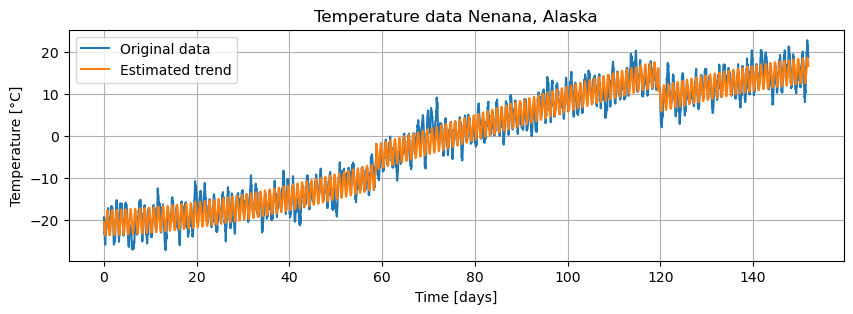

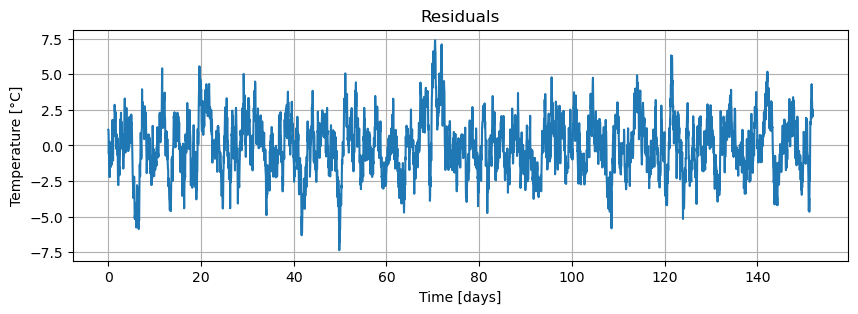

In [16]:
A2 = A_offset
x_hat, y_hat, e_hat = fit_model(data, time_days, A2)

# Plotting the data and the estimated trend
plt.figure(figsize=(10, 3))
plt.plot(time_days, data, label='Original data')
plt.plot(time_days, y_hat, label='Estimated trend')
plt.xlabel('Time [days]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature data Nenana, Alaska')
plt.grid(True)
plt.legend()

# Plotting the residuals
plt.figure(figsize=(10, 3))
plt.plot(time_days, e_hat)
plt.xlabel('Time [days]')
plt.ylabel('Temperature [°C]')
plt.title('Residuals')
plt.grid(True)



# Extracting the seasonal component coefficients from the estimated parameters
ak = np.array([x_hat[1], x_hat[3]])
bk = np.array([x_hat[2], x_hat[4]])
freqs = np.array([1, 1/365])
sigma_e = np.sqrt((e_hat.T @ e_hat)/(len(data)-A2.shape[1]))

sigma_x = sigma_e * np.sqrt(np.diag(np.linalg.inv(A2.T @ A2)))

print(f'Estimated Parameters (standard deviation):')
for i in range(len(x_hat)):
    print(f'x{i} = {x_hat[i]:.3f} ({sigma_x[i]:.3f})')

print('The seasonal component is rewritten as:')
for i, j, k in zip(ak, bk, freqs):
    Ak, theta_k = rewrite_seasonal_comp(i, j)
    print(f'Ak = {Ak:.3f}, theta_k = {theta_k:.3f}, f_k = {k:.3f}')

## Analyzing the residuals
Now that we have our residuals we can fit an AR model to the residuals. We will start by plotting the ACF of the residuals. We will then fit an AR model to the residuals and report the parameters of the AR model. Using the likelihood ratio test framework we will determine the order of the AR model.

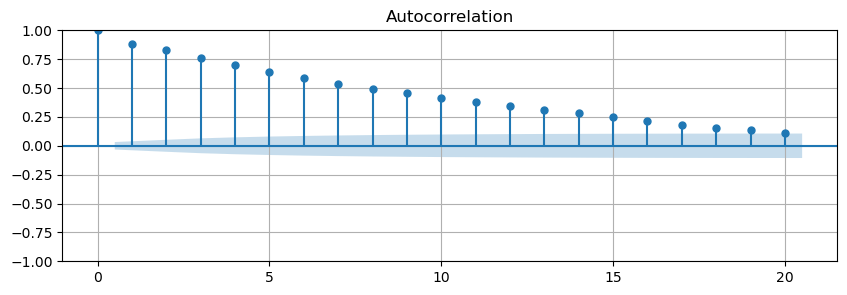

In [17]:
# Lets start with the ACF plot
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
plot_acf(e_hat, ax=ax, lags=20);
ax.grid()

phi: [0.8846601]


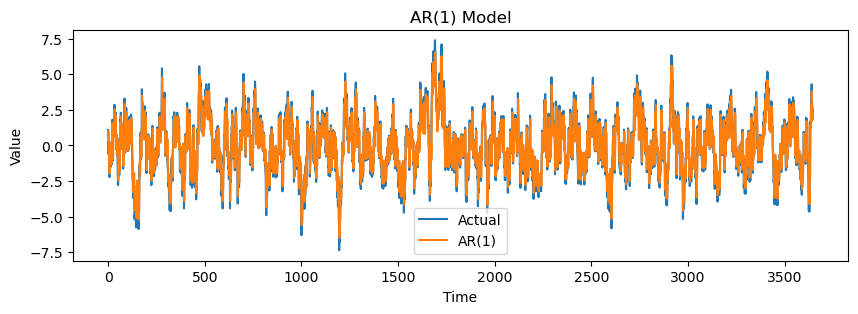

In [18]:
def AR(s, p=1):
    '''
    Function to estimate the AR(p) model
    s: data
    p: order of the AR model
    '''
    y = s[p:]
    # Creating the A matrix for the AR model
    A = np.zeros((len(s)-p, p))
    for i in range(p):
        A[:, i] = s[p-i-1:-i-1]
    
    # Estimating the AR(P) model
    if p == 1:
        phi_hat = (A.T @ y / (A.T @ A))[0]
    else:   
        phi_hat = np.linalg.inv(A.T @ A) @ A.T @ y
    y_hat = np.dot(A, phi_hat)
    e_hat = y - y_hat
    return phi_hat, e_hat, y, A

# Estimating the AR(1) model
phi_hat, s_e_hat, s_y, s_A = AR(e_hat, p=1)



print(f'phi: {phi_hat}')

# plotting the AR(1) model  
plt.figure(figsize=(10, 3))
plt.plot(s_y, label='Actual')
plt.plot(np.dot(s_A, phi_hat), label='AR(1)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AR(1) Model')
plt.legend();



## Testing for number of lags in the AR model

We will use the likelihood ratio test to determine the number of lags in the AR model. We will start by fitting an AR model with 1 lag and then test if we can reject the null hypothesis that the AR model with 1 lag is better than the AR model with 0 lags. We will continue this process until we can no longer reject the null hypothesis.

The test is based on nested models, where the null hypothesis is that the model with the least number of lags is better than the model with the most number of lags. The test statistic is given by:
$$LR = -2 \log \left( \frac{L(\theta_0)}{L(\theta_1)} \right)$$
Where $L(\theta_0)$ is the likelihood of the model with the least number of lags and $L(\theta_1)$ is the likelihood of the model with the most number of lags. The test statistic is asymptotically $\chi^2$ distributed with the degrees of freedom equal to the difference in the number of parameters between the two models. To make this test computationally easier we will rewrite the test statistic as:
$$LR = n  \log(\frac{\text{SSR}_0}{\text{SSR}_1})$$
Where $\text{SSR}_0$ is the sum of squared residuals of the model under the null hypothesis and $\text{SSR}_1$ is the residual sum of squares of the model under the alternative hypothesis.
$$\text{SSR}_i = \epsilon_i^T\epsilon_i$$

In [ ]:
def LR(e0, e1, dof, alpha=0.05):
    '''
    Function to perform the LR test
    e0: residuals under H0
    e1: residuals under H1
    dof: degrees of freedom
    alpha: significance level
    '''
    n = len(e0)
    SSR0 = e0.T @ e0
    SSR1 = e1.T @ e1
    test_stat = n*np.log(SSR0 / SSR1)

    # critical value for the test
    cv = chi2.ppf(1-alpha, dof)
    if test_stat > cv:
        print(f'Test Statistic: {test_stat:.3f} > Critical Value: {cv:.3f}')
        print('Reject the null hypothesis')
        return True
    else:
        print(f'Test Statistic: {test_stat:.3f} < Critical Value: {cv:.3f}')
        print('Fail to reject the null hypothesis')
        return False

# Performing the LR test
p=0
test = True
while test:
    print(f'Performing LR test for AR({p}) and AR({p+1})')
    _, e0, _, _ = AR(e_hat, p)
    _, e1, _, _ = AR(e_hat, p+1)
    test = LR(e0, e1, 1)
    p += 1
    print('-'*50+'\n') 
print(f'Optimal AR order: {p-1}')

Performing LR test for AR(0) and AR(1)
Test Statistic: 5564.603 > Critical Value: 3.841
Reject the null hypothesis
--------------------------------------------------

Performing LR test for AR(1) and AR(2)
Test Statistic: 147.115 > Critical Value: 3.841
Reject the null hypothesis
--------------------------------------------------

Performing LR test for AR(2) and AR(3)
Test Statistic: 0.247 < Critical Value: 3.841
Fail to reject the null hypothesis
--------------------------------------------------

Optimal AR order: 2
